无法加载数据, 使用默认初始值


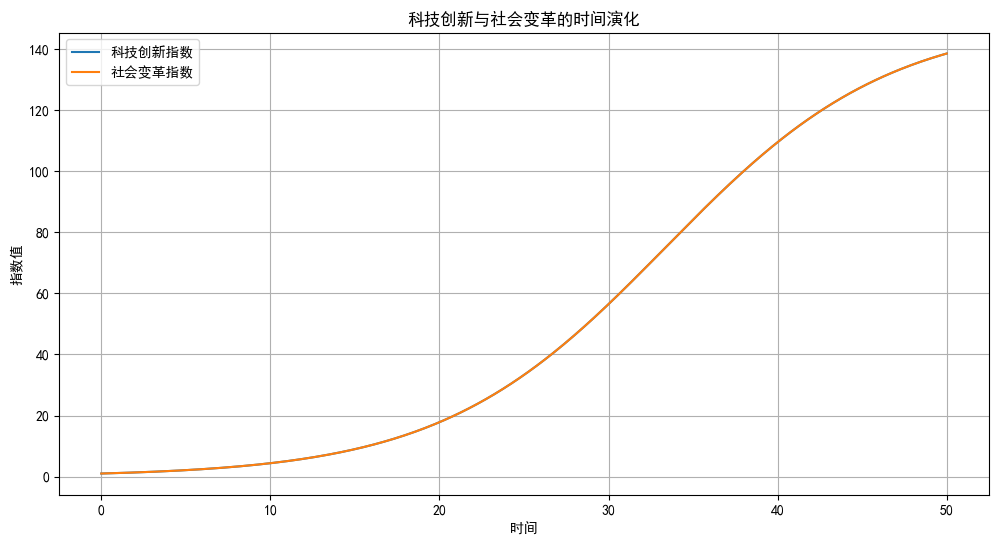

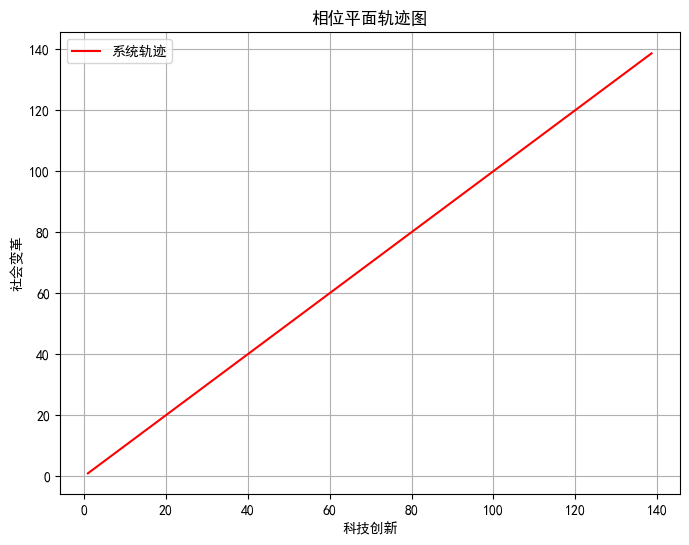

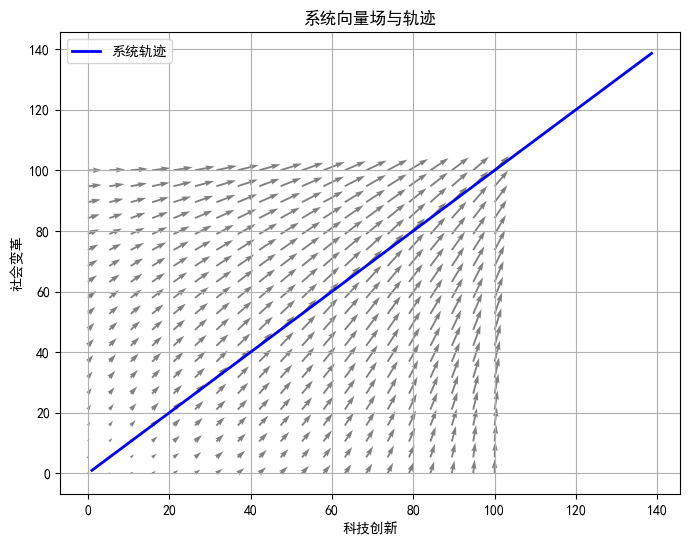

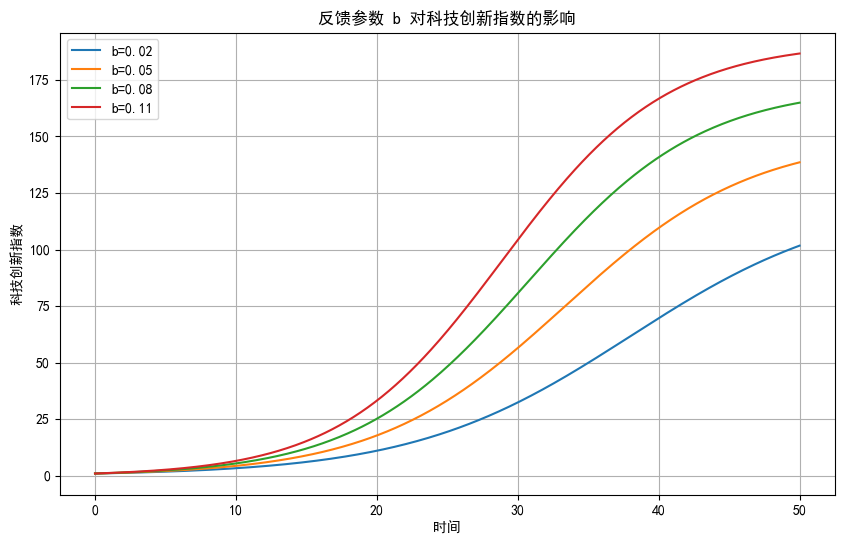

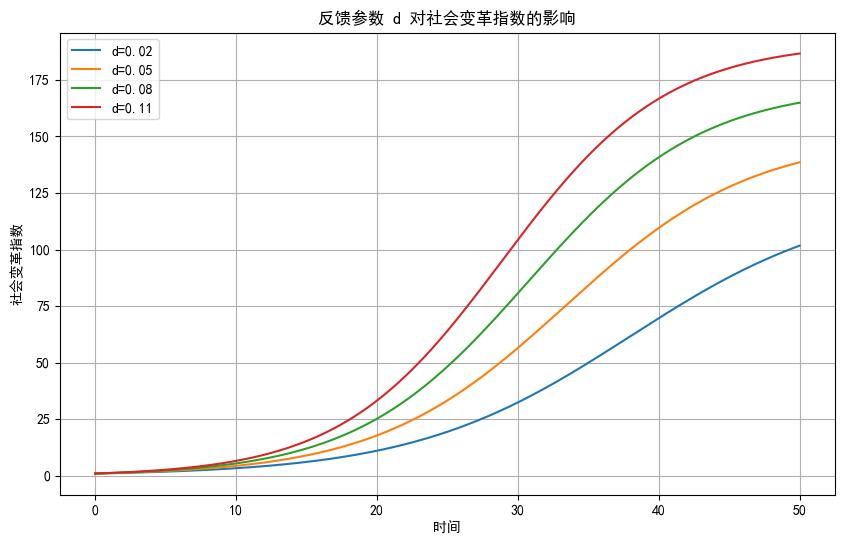

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib
# 设置中文字体和允许负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
# 1. 加载数据（根据实际情况调整文件路径与列名）
data_file = '影响路径总数据.xlsx'
try:
    df = pd.read_excel(data_file)
    print("数据预览：")
    print(df.head())
    # 假设数据中包含 '科技创新' 和 '社会变革' 列
    if '科技创新' in df.columns and '社会变革' in df.columns:
        T0 = df['科技创新'].iloc[0]
        S0 = df['社会变革'].iloc[0]
    else:
        T0, S0 = 1.0, 1.0
except Exception as e:
    print("无法加载数据, 使用默认初始值")
    T0, S0 = 1.0, 1.0

y0 = [T0, S0]

# 2. 定义系统动力学模型的微分方程
def system_dynamics(y, t, a, b, c, d, K_T, K_S):
    T, S = y
    dTdt = a * T * (1 - T / K_T) + b * S
    dSdt = c * S * (1 - S / K_S) + d * T
    return [dTdt, dSdt]

# 3. 设定仿真时间区间
t = np.linspace(0, 50, 500)

# 4. 设定模型参数（可以根据数据拟合进行调整）
a = 0.1     # 科技创新内生增长率
b = 0.05    # 社会变革对科技创新的正向影响
c = 0.1     # 社会变革内生增长率
d = 0.05    # 科技创新对社会变革的正向影响
K_T = 100   # 科技创新饱和值
K_S = 100   # 社会变革饱和值

# 5. 利用 odeint 求解微分方程组
solution = odeint(system_dynamics, y0, t, args=(a, b, c, d, K_T, K_S))
T_sol = solution[:, 0]
S_sol = solution[:, 1]

# 图1：时间演化曲线
plt.figure(figsize=(12, 6))
plt.plot(t, T_sol, label='科技创新指数')
plt.plot(t, S_sol, label='社会变革指数')
plt.xlabel('时间')
plt.ylabel('指数值')
plt.title('科技创新与社会变革的时间演化')
plt.legend()
plt.grid(True)
plt.show()

# 图2：相位平面轨迹图
plt.figure(figsize=(8, 6))
plt.plot(T_sol, S_sol, 'r-', label='系统轨迹')
plt.xlabel('科技创新')
plt.ylabel('社会变革')
plt.title('相位平面轨迹图')
plt.legend()
plt.grid(True)
plt.show()

# 图3：系统向量场与轨迹（Quiver图）
T_vals = np.linspace(0, K_T, 20)
S_vals = np.linspace(0, K_S, 20)
T_grid, S_grid = np.meshgrid(T_vals, S_vals)
dT = a * T_grid * (1 - T_grid / K_T) + b * S_grid
dS = c * S_grid * (1 - S_grid / K_S) + d * T_grid

plt.figure(figsize=(8, 6))
plt.quiver(T_grid, S_grid, dT, dS, color='gray')
plt.plot(T_sol, S_sol, 'b-', linewidth=2, label='系统轨迹')
plt.xlabel('科技创新')
plt.ylabel('社会变革')
plt.title('系统向量场与轨迹')
plt.legend()
plt.grid(True)
plt.show()

# 图4：参数敏感性分析 - 反馈参数 b 对科技创新指数的影响
b_values = [0.02, 0.05, 0.08, 0.11]
plt.figure(figsize=(10, 6))
for b_val in b_values:
    sol_temp = odeint(system_dynamics, y0, t, args=(a, b_val, c, d, K_T, K_S))
    T_temp = sol_temp[:, 0]
    plt.plot(t, T_temp, label=f'b={b_val}')
plt.xlabel('时间')
plt.ylabel('科技创新指数')
plt.title('反馈参数 b 对科技创新指数的影响')
plt.legend()
plt.grid(True)
plt.show()

# 图5：参数敏感性分析 - 反馈参数 d 对社会变革指数的影响
d_values = [0.02, 0.05, 0.08, 0.11]
plt.figure(figsize=(10, 6))
for d_val in d_values:
    sol_temp = odeint(system_dynamics, y0, t, args=(a, b, c, d_val, K_T, K_S))
    S_temp = sol_temp[:, 1]
    plt.plot(t, S_temp, label=f'd={d_val}')
plt.xlabel('时间')
plt.ylabel('社会变革指数')
plt.title('反馈参数 d 对社会变革指数的影响')
plt.legend()
plt.grid(True)
plt.show()


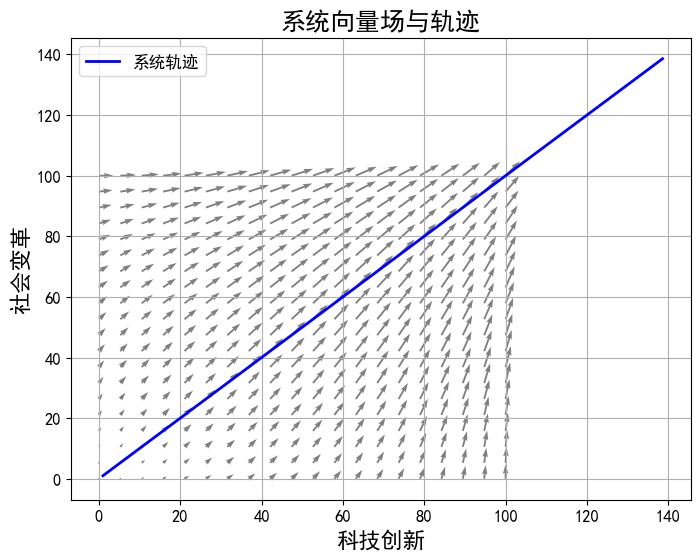

In [2]:
# 图3：系统向量场与轨迹（Quiver图） - 优化字体大小
plt.figure(figsize=(8, 6))
plt.quiver(T_grid, S_grid, dT, dS, color='gray')
plt.plot(T_sol, S_sol, 'b-', linewidth=2, label='系统轨迹')
plt.xlabel('科技创新', fontsize=16)
plt.ylabel('社会变革', fontsize=16)
plt.title('系统向量场与轨迹', fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

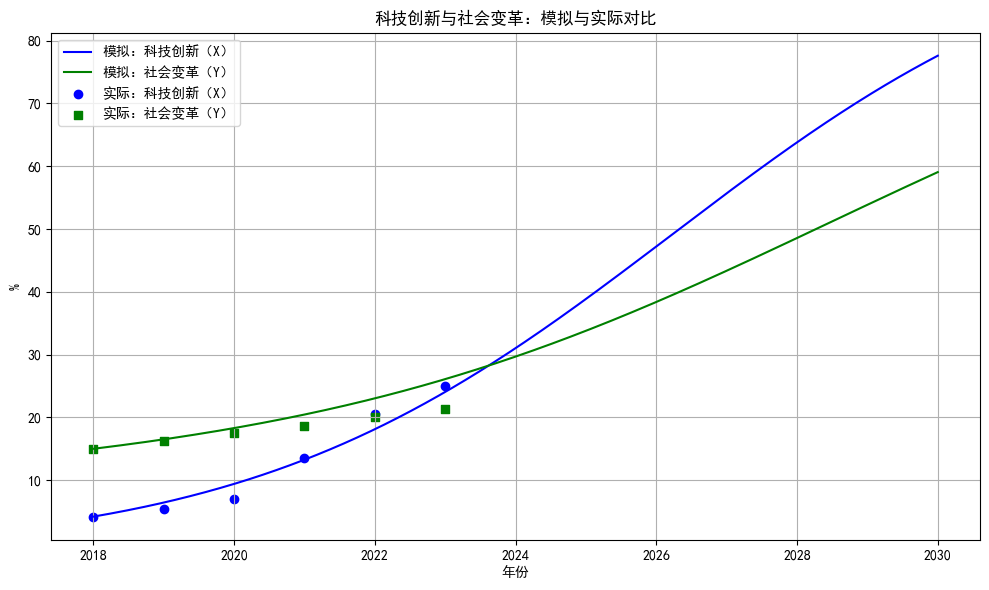

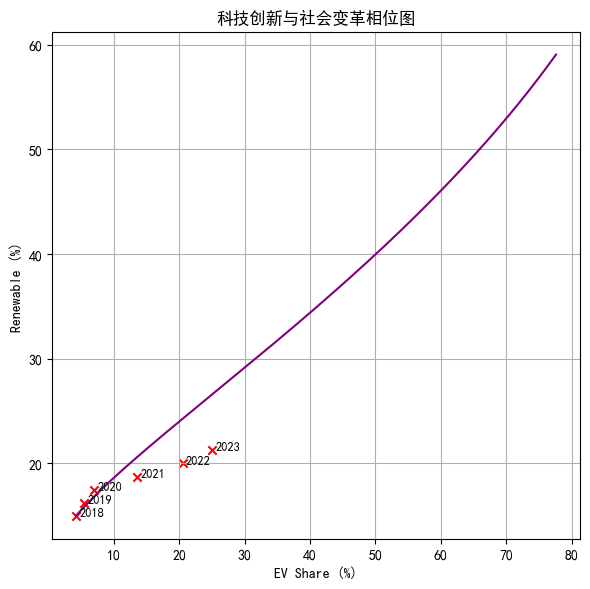

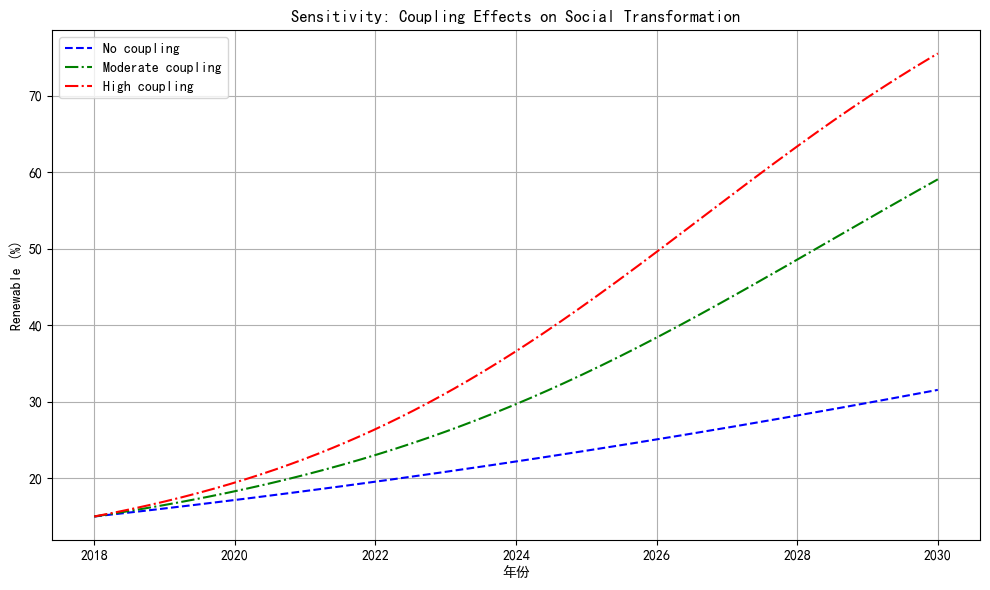

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os

# 加载数据
df = pd.read_excel("../data/影响路径总数据.xlsx", header=[0, 1])
X_data = df[("技术创新指标", "新能源汽车市场占有率")].values
Y_data = df[("环境与可持续发展变量", "可再生能源利用率")].values
years = df[("Unnamed: 0_level_0", "年份")].values

# 初始条件
X0, Y0 = X_data[0], Y_data[0]
initial_conditions = [X0, Y0]

# 微分方程定义
def coupled_system(y, t, rX, alpha, rY, beta, KX, KY):
    X, Y = y
    dXdt = rX * X * (1 - X / KX) + alpha * Y * (1 - X / KX)
    dYdt = rY * Y * (1 - Y / KY) + beta * X * (1 - Y / KY)
    return [dXdt, dYdt]

# 模拟参数
rX, rY = 0.3, 0.08
alpha, beta = 0.05, 0.1
KX = KY = 100
t = np.linspace(0, 12, 500)  # 2018-2030
sim_years = np.linspace(years[0], years[0] + 12, 500)

# 求解微分方程
sol = odeint(coupled_system, initial_conditions, t, args=(rX, alpha, rY, beta, KX, KY))
X_sol, Y_sol = sol[:, 0], sol[:, 1]

# 可视化1：实际 vs 模拟
plt.figure(figsize=(10, 6))
plt.plot(sim_years, X_sol, label='模拟：科技创新（X）', color='blue')
plt.plot(sim_years, Y_sol, label='模拟：社会变革（Y）', color='green')
plt.scatter(years, X_data, label='实际：科技创新（X）', color='blue', marker='o')
plt.scatter(years, Y_data, label='实际：社会变革（Y）', color='green', marker='s')
plt.xlabel("年份")
plt.ylabel("%")
plt.title("科技创新与社会变革：模拟与实际对比")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_vs_data_fixed.png")

# 可视化2：相位图
plt.figure(figsize=(6, 6))
plt.plot(X_sol, Y_sol, label='模拟轨迹', color='purple')
plt.scatter(X_data, Y_data, color='red', marker='x')
for i, year in enumerate(years):
    plt.text(X_data[i]+0.5, Y_data[i], str(year), fontsize=9)
plt.xlabel("EV Share (%)")
plt.ylabel("Renewable (%)")
plt.title("科技创新与社会变革相位图")
plt.grid(True)
plt.tight_layout()
plt.savefig("phase_plot_fixed.png")

# 可视化3：敏感性分析
plt.figure(figsize=(10, 6))
beta_list = [0.0, 0.1, 0.2]
color_list = ['blue', 'green', 'red']
label_list = ['No coupling', 'Moderate coupling', 'High coupling']
for beta_i, color, label in zip(beta_list, color_list, label_list):
    sol_tmp = odeint(coupled_system, initial_conditions, t, args=(rX, alpha, rY, beta_i, KX, KY))
    Y_tmp = sol_tmp[:, 1]
    plt.plot(sim_years, Y_tmp, linestyle='--' if beta_i==0 else '-.', color=color, label=label)
plt.xlabel("年份")
plt.ylabel("Renewable (%)")
plt.title("Sensitivity: Coupling Effects on Social Transformation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sensitivity_beta_fixed.png")

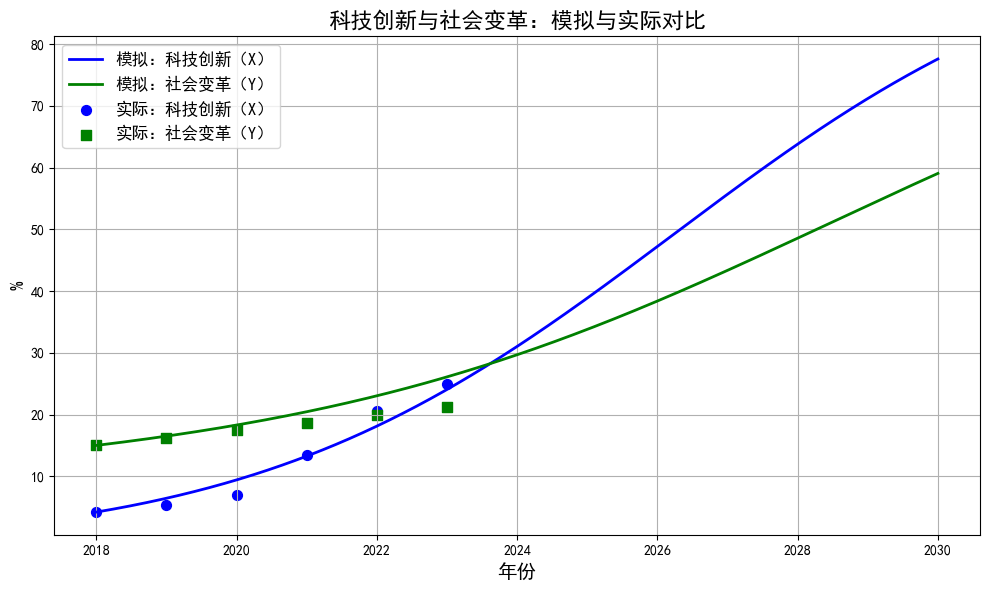

In [5]:
# 可视化1：实际 vs 模拟 - 优化字体和样式
plt.figure(figsize=(10, 6))
plt.plot(sim_years, X_sol, label='模拟：科技创新（X）', color='blue', linewidth=2)
plt.plot(sim_years, Y_sol, label='模拟：社会变革（Y）', color='green', linewidth=2)
plt.scatter(years, X_data, label='实际：科技创新（X）', color='blue', marker='o', s=50)
plt.scatter(years, Y_data, label='实际：社会变革（Y）', color='green', marker='s', s=50)
plt.xlabel("年份", fontsize=14)
plt.ylabel("%", fontsize=14)
plt.title("科技创新与社会变革：模拟与实际对比", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("model_vs_data_fixed_optimized.png")
plt.show()

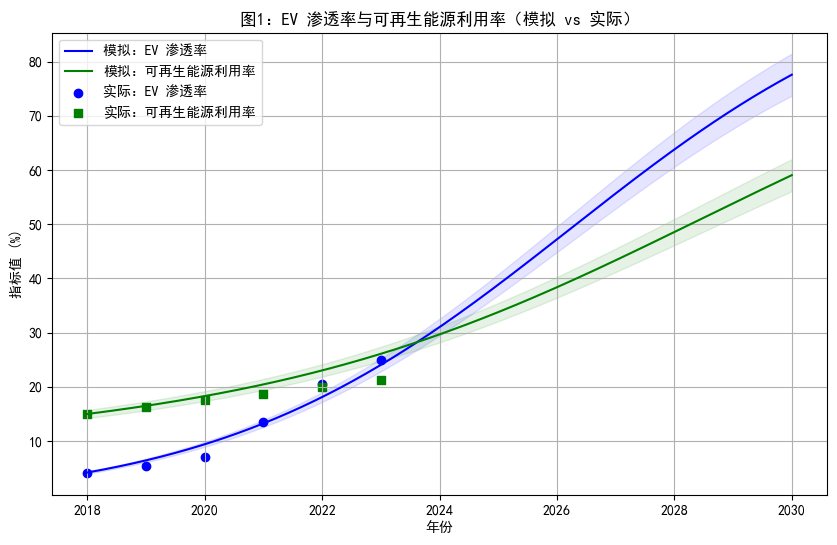

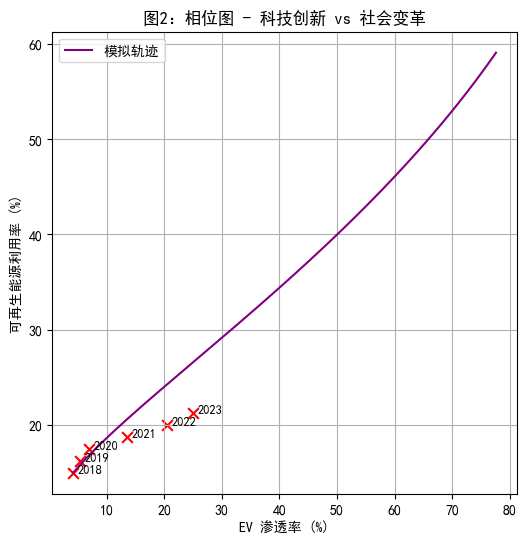

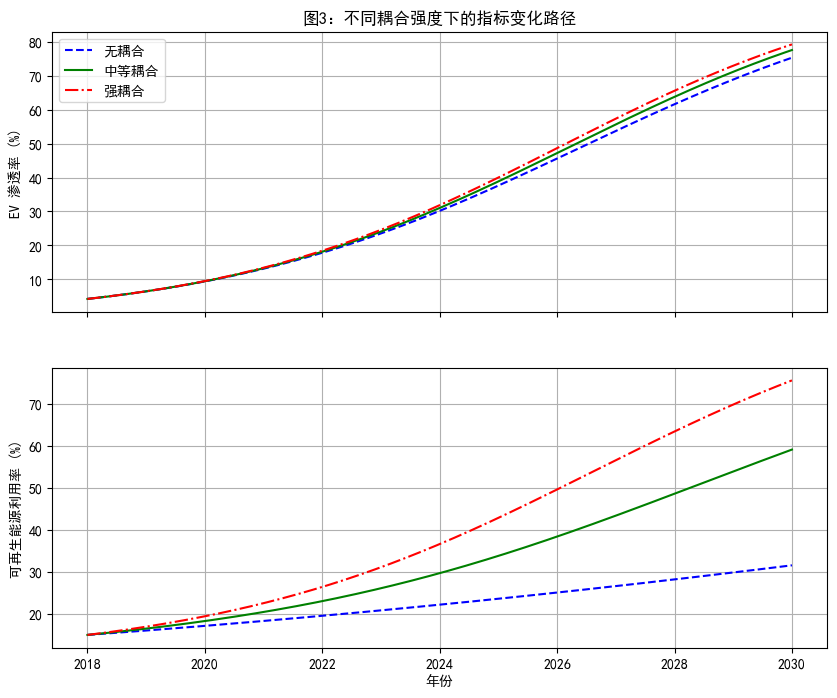

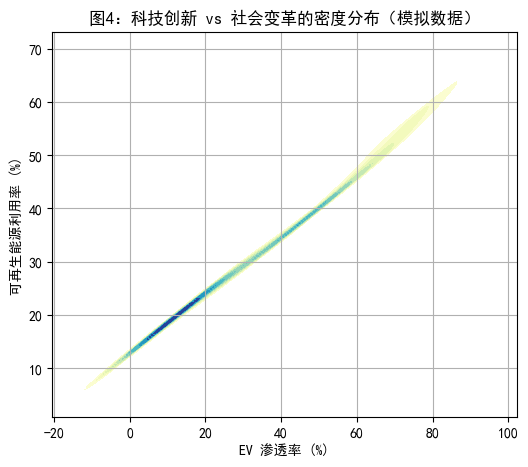

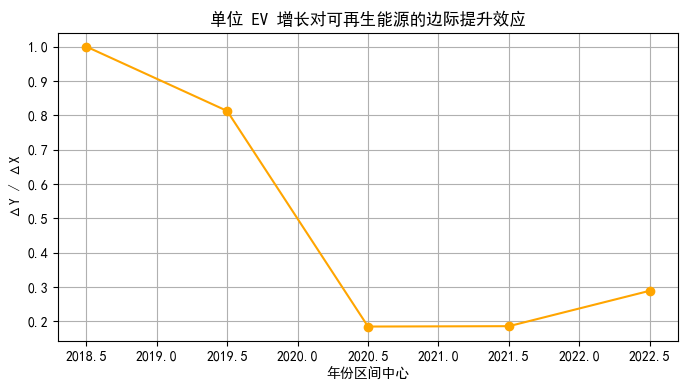

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# 再次使用前面处理好的数据和仿真结果
# 初始数据（X_data: EV 渗透率，Y_data: 可再生能源利用率，years: 年份）
# 模拟结果（X_sol, Y_sol 对应 sim_years 时间点）

# 1. 图表：实际值 vs 模拟值的时间演化曲线（带阴影）
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(sim_years, X_sol, color='blue', label='模拟：EV 渗透率')
ax1.plot(sim_years, Y_sol, color='green', label='模拟：可再生能源利用率')
ax1.fill_between(sim_years, X_sol * 0.95, X_sol * 1.05, color='blue', alpha=0.1)
ax1.fill_between(sim_years, Y_sol * 0.95, Y_sol * 1.05, color='green', alpha=0.1)
ax1.scatter(years, X_data, color='blue', marker='o', label='实际：EV 渗透率')
ax1.scatter(years, Y_data, color='green', marker='s', label='实际：可再生能源利用率')
ax1.set_xlabel("年份")
ax1.set_ylabel("指标值 (%)")
ax1.set_title("图1：EV 渗透率与可再生能源利用率（模拟 vs 实际）")
ax1.legend()
ax1.grid(True)

# 2. 图表：相位图（X vs Y）+ 年份标注
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.plot(X_sol, Y_sol, color='purple', label='模拟轨迹')
ax2.scatter(X_data, Y_data, color='red', marker='x', s=60)
for i, year in enumerate(years):
    ax2.text(X_data[i]+0.8, Y_data[i], str(year), fontsize=9)
ax2.set_xlabel("EV 渗透率 (%)")
ax2.set_ylabel("可再生能源利用率 (%)")
ax2.set_title("图2：相位图 - 科技创新 vs 社会变革")
ax2.legend()
ax2.grid(True)

# 3. 图表：耦合强度敏感性分析 (subplot)
fig3, (ax3a, ax3b) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
beta_values = [0.0, 0.1, 0.2]
styles = ['--', '-', '-.']
colors = ['blue', 'green', 'red']
labels = ['无耦合', '中等耦合', '强耦合']

for beta_i, style, color, label in zip(beta_values, styles, colors, labels):
    sol_tmp = odeint(coupled_system, initial_conditions, t, args=(rX, alpha, rY, beta_i, KX, KY))
    ax3a.plot(sim_years, sol_tmp[:, 0], linestyle=style, color=color, label=label)
    ax3b.plot(sim_years, sol_tmp[:, 1], linestyle=style, color=color, label=label)

ax3a.set_ylabel("EV 渗透率 (%)")
ax3b.set_ylabel("可再生能源利用率 (%)")
ax3b.set_xlabel("年份")
ax3a.set_title("图3：不同耦合强度下的指标变化路径")
ax3a.legend()
ax3a.grid(True)
ax3b.grid(True)

# 4. 图表：二维热力图（模拟数据生成的密度分布）
fig4, ax4 = plt.subplots(figsize=(6, 5))
sns.kdeplot(x=X_sol, y=Y_sol, cmap="YlGnBu", fill=True, ax=ax4)
ax4.set_xlabel("EV 渗透率 (%)")
ax4.set_ylabel("可再生能源利用率 (%)")
ax4.set_title("图4：科技创新 vs 社会变革的密度分布（模拟数据）")
ax4.grid(True)

# 5. 图表：边际变化趋势（斜率变化图）
# 计算每年之间的边际影响比：ΔY/ΔX
marginal_ratios = np.diff(Y_data) / np.diff(X_data)
mid_years = (years[:-1] + years[1:]) / 2

fig5, ax5 = plt.subplots(figsize=(8, 4))
ax5.plot(mid_years, marginal_ratios, marker='o', color='orange')
ax5.set_xlabel("年份区间中心")
ax5.set_ylabel("ΔY / ΔX")
ax5.set_title("单位 EV 增长对可再生能源的边际提升效应")
ax5.grid(True)




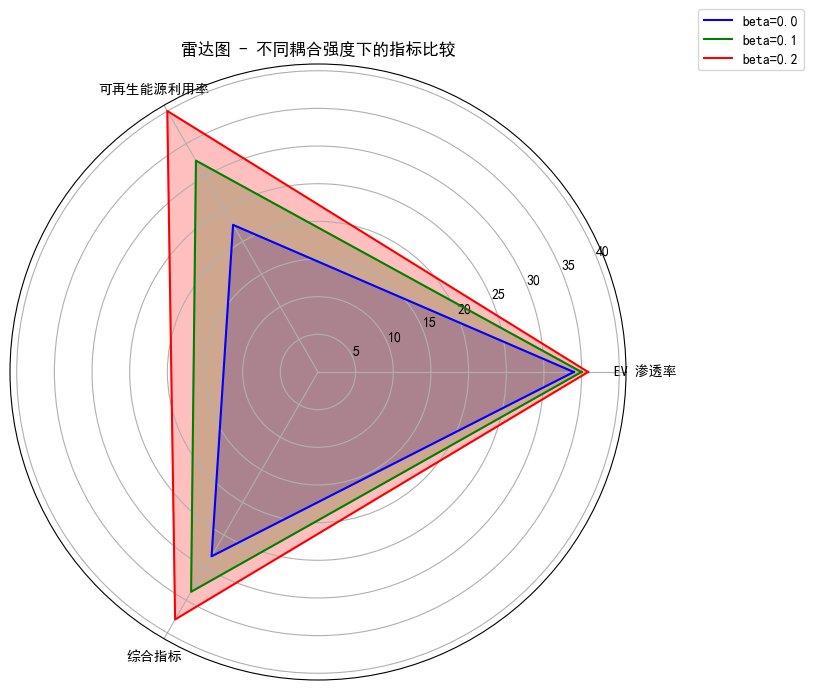

In [6]:
# 使用雷达图展示不同耦合强度下的指标比较

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# 定义不同 beta 值（耦合参数）列表
beta_values = [0.0, 0.1, 0.2]

# 计算各 beta 值下的 EV 渗透率和可再生能源利用率的平均值
averages_X = []
averages_Y = []
for beta_val in beta_values:
    sol_tmp = odeint(coupled_system, initial_conditions, t, args=(rX, alpha, rY, beta_val, KX, KY))
    avg_X = np.mean(sol_tmp[:, 0])
    avg_Y = np.mean(sol_tmp[:, 1])
    averages_X.append(avg_X)
    averages_Y.append(avg_Y)

# 计算一个简单的综合指标：平均值
averages_total = [(x + y) / 2 for x, y in zip(averages_X, averages_Y)]

# 雷达图需要的指标标签（这里构造三个维度：EV渗透率、可再生能源利用率和综合指标）
labels = ['EV 渗透率', '可再生能源利用率', '综合指标']
num_vars = len(labels)

# 计算每个指标对应的角度（单位：弧度）
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 使雷达图闭合

# 创建雷达图
fig_rad, ax_rad = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['b', 'g', 'r']

for idx, beta_val in enumerate(beta_values):
    # 当前 beta 下的三个指标数据
    stats = [averages_X[idx], averages_Y[idx], averages_total[idx]]
    stats += stats[:1]  # 闭合图形
    ax_rad.plot(angles, stats, color=colors[idx], label=f'beta={beta_val}')
    ax_rad.fill(angles, stats, color=colors[idx], alpha=0.25)

# 设置指标标签
ax_rad.set_thetagrids(np.degrees(angles[:-1]), labels)
ax_rad.set_title("雷达图 - 不同耦合强度下的指标比较")
ax_rad.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

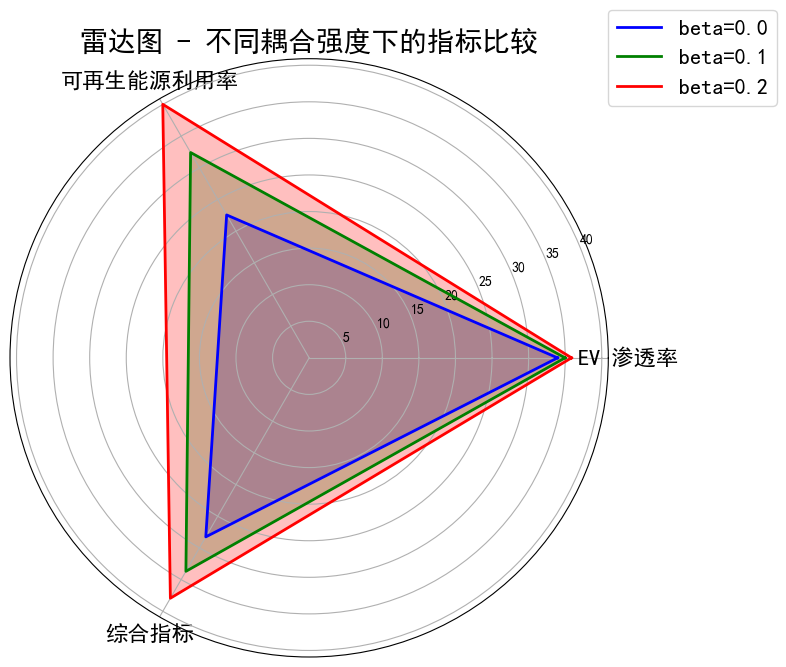

In [7]:
fig_rad, ax_rad = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['b', 'g', 'r']
for idx, beta_val in enumerate(beta_values):
    stats = [averages_X[idx], averages_Y[idx], averages_total[idx]]
    stats += stats[:1]  # 闭合图形
    ax_rad.plot(angles, stats, color=colors[idx], label=f'beta={beta_val}', linewidth=2)
    ax_rad.fill(angles, stats, color=colors[idx], alpha=0.25)
ax_rad.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=16)
ax_rad.set_title("雷达图 - 不同耦合强度下的指标比较", fontsize=20)
ax_rad.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=16)
plt.tight_layout()
plt.show()

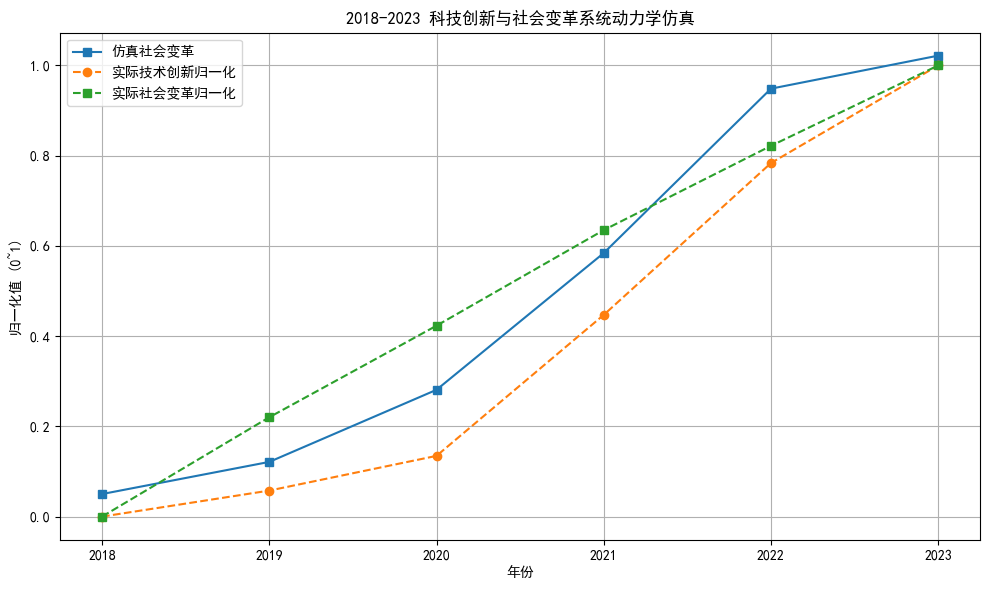

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 构造数据
data = {
    '年份': pd.to_datetime([
        '2018-01-01', '2019-01-01', '2020-01-01',
        '2021-01-01', '2022-01-01', '2023-01-01'
    ]),
    'tech_innovation': [4.2, 5.4, 7.0, 13.5, 20.5, 25.0],
    'industry_gdp_share': [10.0, 11.3, 13.9, 14.5, 16.9, 20.4],
    'employment_index': [819.0015, 815.4941, 812.1999, 798.0822, 776.1930, 767.8772],
    'carbon_emission': [11.5, 11.8, 12.0, 12.71, 12.70, 12.62],
    'private_car_ownership': [205749339, 225089941, 242911902, 261520221, 277921065, 293568923],
}

# 创建 DataFrame
df_sim = pd.DataFrame(data)
df_sim.set_index('年份', inplace=True)

# 归一化
tech_min = df_sim['tech_innovation'].min()
tech_max = df_sim['tech_innovation'].max()
social_min = df_sim['private_car_ownership'].min()
social_max = df_sim['private_car_ownership'].max()

df_sim['tech_norm'] = (df_sim['tech_innovation'] - tech_min) / (tech_max - tech_min)
df_sim['social_norm'] = (df_sim['private_car_ownership'] - social_min) / (social_max - social_min)

# 模型参数
r_T = 1.0
r_S = 1.0
k_TS = 0.5
k_ST = 0.5
dt = 1

# 仿真周期与初始值
time_steps = len(df_sim)
years_sim = df_sim.index.year.values

T_sim = np.zeros(time_steps)
S_sim = np.zeros(time_steps)
T_sim[0] = 0.05
S_sim[0] = 0.05

# 系统动力学仿真
for i in range(time_steps - 1):
    T_sim[i+1] = T_sim[i] + dt * (r_T * T_sim[i] * (1 - T_sim[i]) + k_TS * S_sim[i] * (1 - T_sim[i]))
    S_sim[i+1] = S_sim[i] + dt * (r_S * S_sim[i] * (1 - S_sim[i]) + k_ST * T_sim[i] * (1 - S_sim[i]))

# 绘图
plt.figure(figsize=(10,6))
plt.plot(years_sim, S_sim, marker='s', label='仿真社会变革')
plt.plot(years_sim, df_sim['tech_norm'].values, 'o--', label='实际技术创新归一化')
plt.plot(years_sim, df_sim['social_norm'].values, 's--', label='实际社会变革归一化')

plt.xlabel('年份')
plt.ylabel('归一化值 (0~1)')
plt.title('2018-2023 科技创新与社会变革系统动力学仿真')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\12914\AppData\Local\Temp\ipykernel_13348\505541796.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='年份', y='仿真社会变革', data=df_results, inner="quartile", palette=custom_palette)


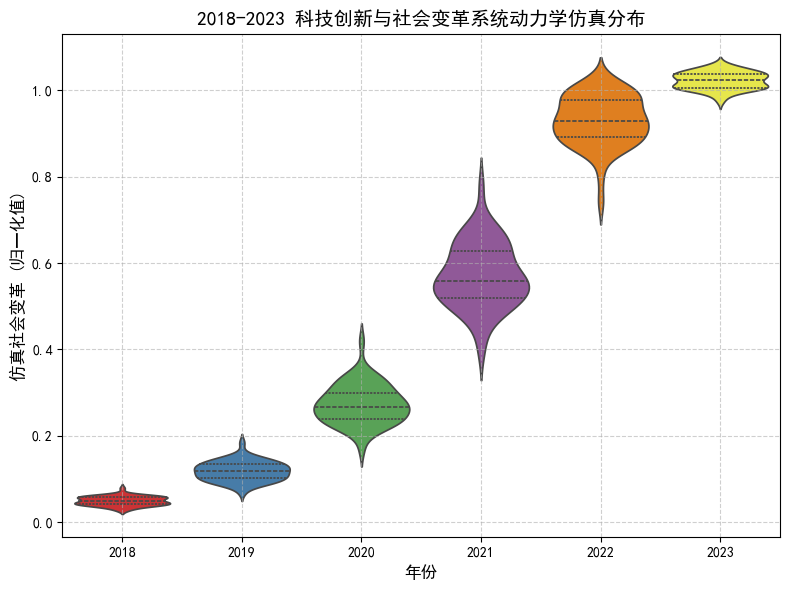

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 构造数据并归一化
data = {
    '年份': pd.to_datetime([
        '2018-01-01', '2019-01-01', '2020-01-01',
        '2021-01-01', '2022-01-01', '2023-01-01'
    ]),
    'tech_innovation': [4.2, 5.4, 7.0, 13.5, 20.5, 25.0],
    'industry_gdp_share': [10.0, 11.3, 13.9, 14.5, 16.9, 20.4],
    'employment_index': [819.0015, 815.4941, 812.1999, 798.0822, 776.1930, 767.8772],
    'carbon_emission': [11.5, 11.8, 12.0, 12.71, 12.70, 12.62],
    'private_car_ownership': [205749339, 225089941, 242911902, 261520221, 277921065, 293568923],
}
df_sim = pd.DataFrame(data)
df_sim.set_index('年份', inplace=True)
tech_min = df_sim['tech_innovation'].min()
tech_max = df_sim['tech_innovation'].max()
social_min = df_sim['private_car_ownership'].min()
social_max = df_sim['private_car_ownership'].max()

df_sim['tech_norm'] = (df_sim['tech_innovation'] - tech_min) / (tech_max - tech_min)
df_sim['social_norm'] = (df_sim['private_car_ownership'] - social_min) / (social_max - social_min)

# 模型参数
r_T = 1.0
r_S = 1.0
k_TS = 0.5
k_ST = 0.5
dt = 1

# 仿真周期与年份信息
time_steps = len(df_sim)
years_sim = df_sim.index.year.values

# 为了生成分布数据，进行多次仿真，加入少量噪声
n_runs = 50
results = []
noise_std = 0.01

for run in range(n_runs):
    T_sim = np.zeros(time_steps)
    S_sim = np.zeros(time_steps)
    T_sim[0] = 0.05 + np.random.normal(0, noise_std)
    S_sim[0] = 0.05 + np.random.normal(0, noise_std)
    for i in range(time_steps - 1):
        T_sim[i+1] = T_sim[i] + dt * (r_T * T_sim[i] * (1 - T_sim[i]) + k_TS * S_sim[i] * (1 - T_sim[i])) \
                    + np.random.normal(0, noise_std)
        S_sim[i+1] = S_sim[i] + dt * (r_S * S_sim[i] * (1 - S_sim[i]) + k_ST * T_sim[i] * (1 - S_sim[i])) \
                    + np.random.normal(0, noise_std)
    for year, s_val in zip(years_sim, S_sim):
        results.append({'年份': year, '仿真社会变革': s_val})

df_results = pd.DataFrame(results)

# 自定义颜色列表
custom_palette = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']

# 绘制小提琴图，并优化细节
plt.figure(figsize=(8, 6))
sns.violinplot(x='年份', y='仿真社会变革', data=df_results, inner="quartile", palette=custom_palette)

plt.xlabel("年份", fontsize=12, fontweight='bold')
plt.ylabel("仿真社会变革 (归一化值)", fontsize=12, fontweight='bold')
plt.title("2018-2023 科技创新与社会变革系统动力学仿真分布", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\12914\AppData\Local\Temp\ipykernel_13348\4252437488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='年份', y='仿真社会变革', data=df_results, inner="quartile", palette=custom_palette)


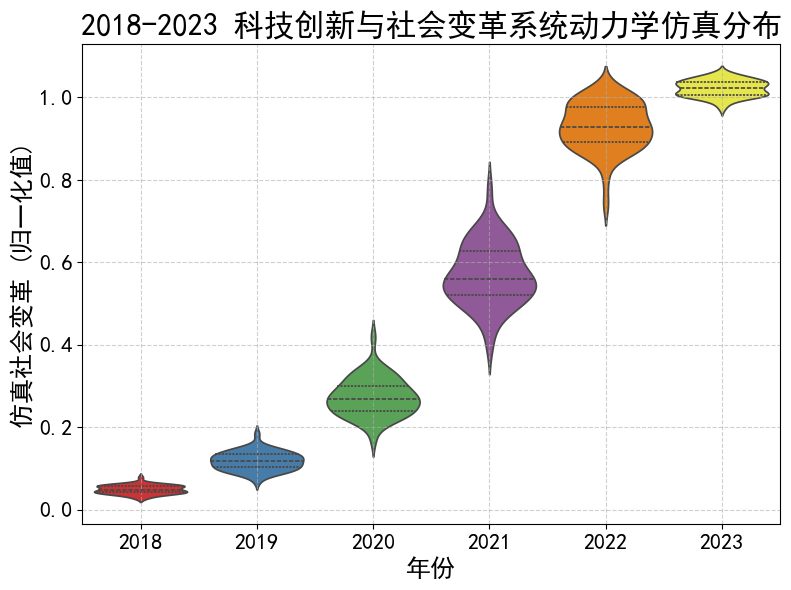

In [9]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='年份', y='仿真社会变革', data=df_results, inner="quartile", palette=custom_palette)

plt.xlabel("年份", fontsize=18, fontweight='bold')
plt.ylabel("仿真社会变革 (归一化值)", fontsize=18, fontweight='bold')
plt.title("2018-2023 科技创新与社会变革系统动力学仿真分布", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

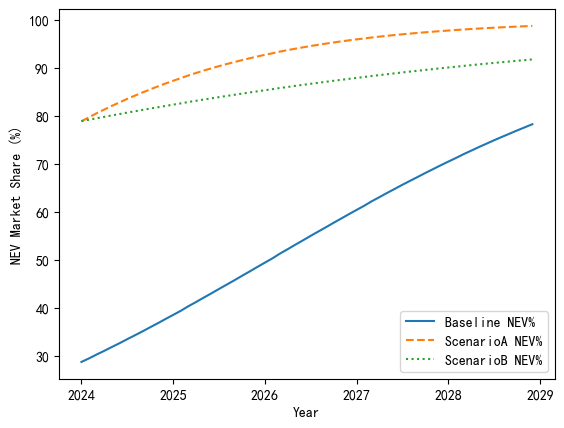

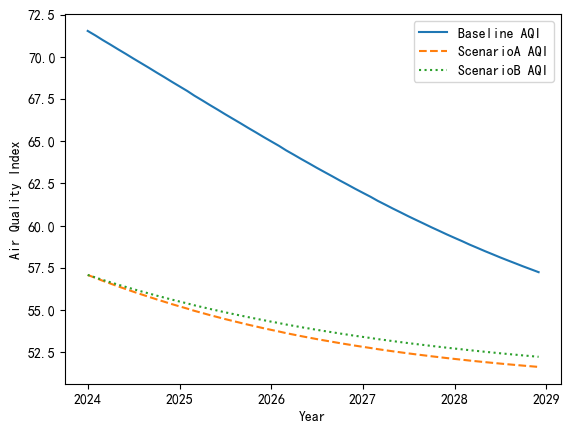

In [18]:
import numpy as np
import pandas as pd

# 初始化变量（2023年末数据作为起点）
S = 0.2877   # 新能源车市场占有率 (28.77%)
P = 9614.0   # 新能源技术专利数
GDP_share = 0.216   # NEV产业链占GDP比值 (21.6%)
Emp_index = 767.88  # 交通行业就业指数
M_chg = 677.0       # 充电桩市场规模指数
N_swap = 3394.0     # 换电站保有量
smart_new = 0.3818  # 智能驾驶新车渗透率 (38.18%)
EV_fleet = 0.0728   # 新能源车保有率（7.3%）
smart_fleet = 0.1149 # 智能驾驶车队渗透率（约11.5%）
AQI = 71.54         # 空气质量指数
CO2 = 12.62         # 年碳排放量 (Gt)
Ren_share = 0.213   # 可再生能源利用率 (21.3%)
Cars = 293568923.0  # 私人汽车保有量
ride_share = 0.82   # 网约车中NEV占比 (82%)

# 参数设置
# Logistic增长率参数
r_S = 0.444    # 新能源车市场 占有率 年增长率
r_smart = 0.55 # 智能驾驶渗透率 年增长率
r_industry = 0.22  # 产业链GDP占比 年增速参数
K_industry = 0.4   # 产业链GDP占比上限
r_chg = 0.589   # 充电桩市场规模 年增速
K_chg = 2000.0  # 充电桩市场规模 饱和值
r_swap = 1.007  # 换电站保有量 年增速
K_swap = 5000.0 # 换电站 饱和值
r_ride = 0.45   # 网约车NEV占比 年增速

# 碳排放和空气质量参数
base_CO2_growth = 0.02      # 碳排放自然增长率 2%/年
CO2_reduction_factor = 0.086 # 每%EV或可再生减排0.086 Gt
AQI_factor = 1.5            # AQI改善系数（初始阶段每%带来约1.5指数降低）
initial_AQI = 87.0          # 2018年AQI基准值用于递减权重计算

# 事故率参数
accident_reduction = 0.65   # 智能驾驶完全渗透可减少65%事故
base_accident_rate = 166906/205749339  # 2018年：年事故率=166906/2.057e8车辆
acc_rate_improve = 0.07     # 每年事故基础率下降7%

# 车队渗透率转换参数
tau = 120  # 车辆平均寿命120个月（10年）

# 仿真时间设置：2024-01到2028-12逐月
months = pd.date_range('2024-01-01', '2028-12-01', freq='MS')
results = []

# 逐月循环仿真
for date in months:
    # 记录当前状态
    results.append([date, S, P, GDP_share, Emp_index, M_chg, N_swap,
                    smart_new, AQI, CO2, Ren_share, Cars, ride_share])
    # （1）更新反馈变量
    # 记录旧值用于增量计算
    EV_fleet_old = EV_fleet
    Ren_old = Ren_share
    # Logistic类增长
    S += (r_S/12) * S * (1 - S)  # NEV新车占比
    smart_new += (r_smart/12) * smart_new * (1 - smart_new)
    GDP_share += (r_industry/12) * GDP_share * (1 - GDP_share/K_industry)
    M_chg += (r_chg/12) * M_chg * (1 - M_chg/K_chg)
    N_swap += (r_swap/12) * N_swap * (1 - N_swap/K_swap)
    ride_share += (r_ride/12) * ride_share * (1 - ride_share)
    # （2）车辆保有渗透率转化（滞后效应）
    EV_fleet += (S - EV_fleet) / tau
    smart_fleet += (smart_new - smart_fleet) / tau
    # （3）外生推进变量
    Ren_share += 0.00125  # 可再生能源每月提高0.125%
    if Ren_share > 1: Ren_share = 1.0
    # （4）技术创新和就业
    # 专利每年增加量逐步下降（从2023年的~700/年降至~300/年）
    P_growth = np.interp(date.year + (date.month-1)/12,
                         [2023, 2028], [700, 300])
    P += P_growth/12
    # 就业指数缓降（假设每年下降~10）
    Emp_index -= (10/12)
    if Emp_index < 0: Emp_index = 0
    # （5）环境指标
    # 碳排放 = 上月排放 + 自然增长 - EV&可再生减排
    CO2 += (CO2 * base_CO2_growth/12) \
           - CO2_reduction_factor * ((EV_fleet - EV_fleet_old) + (Ren_share - Ren_old))
    # 空气质量指数 = 上月AQI - 改善幅度
    AQI -= AQI_factor * 100 * ((EV_fleet - EV_fleet_old) + (Ren_share - Ren_old)) \
           * ((AQI - 50)/(initial_AQI - 50))
    if AQI < 50: AQI = 50
    # （6）更新私人汽车保有量（假设逐年增量放缓：2024年+1565万，之后每年递减50万）
    year = date.year
    annual_inc = 15.65e6 - (year-2024)*0.5e6
    if annual_inc < 0: annual_inc = 0
    Cars += annual_inc/12

# 转换结果为DataFrame便于分析
sim_df = pd.DataFrame(results, columns=['Date','NEV_share','Patents','GDP_share',
                                       'Emp_index','Charging_market','Swap_stations',
                                       'Smart_share','AQI','CO2','Renewables',
                                       'Private_cars','Ridehail_share'])

def simulate_scenario(r_S_val, r_smart_val, ren_monthly_add, r_chg_val, r_swap_val):
    # 复制初始状态
    S_val = S; P_val = P; GDP_val = GDP_share; Emp_val = Emp_index
    Mchg_val = M_chg; Nswap_val = N_swap
    smart_new_val = smart_new; EVfleet_val = EV_fleet; smart_fleet_val = smart_fleet
    AQI_val = AQI; CO2_val = CO2; Ren_val = Ren_share
    Cars_val = Cars; ride_val = ride_share
    data = []
    for date in months:
        data.append([date, S_val, AQI_val, CO2_val, Ren_val])
        EV_old = EVfleet_val; Ren_old = Ren_val
        # Logistic驱动
        S_val += (r_S_val/12) * S_val * (1 - S_val)
        smart_new_val += (r_smart_val/12) * smart_new_val * (1 - smart_new_val)
        Mchg_val += (r_chg_val/12) * Mchg_val * (1 - Mchg_val/K_chg)
        Nswap_val += (r_swap_val/12) * Nswap_val * (1 - Nswap_val/K_swap)
        # 渗透率滞后
        EVfleet_val += (S_val - EVfleet_val)/tau
        smart_fleet_val += (smart_new_val - smart_fleet_val)/tau
        # 可再生能源
        Ren_val += ren_monthly_add
        if Ren_val > 1: Ren_val = 1.0
        # 环境
        CO2_val += (CO2_val * base_CO2_growth/12) \
            - CO2_reduction_factor * ((EVfleet_val - EV_old) + (Ren_val - Ren_old))
        AQI_val -= AQI_factor * 100 * ((EVfleet_val - EV_old) + (Ren_val - Ren_old)) \
            * ((AQI_val - 50)/(initial_AQI - 50))
        if AQI_val < 50: AQI_val = 50
        # 汽车保有量（同基准假设）
        year = date.year
        annual_inc = 15.65e6 - (year-2024)*0.5e6
        if annual_inc < 0: annual_inc = 0
        Cars_val += annual_inc/12
    return pd.DataFrame(data, columns=['Date','NEV_share','AQI','CO2','Renewables'])

# 运行情景A和B仿真
scenarioA = simulate_scenario(0.60, 0.70, 0.00167, 0.70, 1.20)
scenarioB = simulate_scenario(0.22, 0.40, 0.00083, 0.40, 0.80)

import matplotlib.pyplot as plt

# 新能源汽车与智能驾驶渗透率趋势
plt.plot(sim_df['Date'], sim_df['NEV_share']*100, label='Baseline NEV%')
plt.plot(scenarioA['Date'], scenarioA['NEV_share']*100, '--', label='ScenarioA NEV%')
plt.plot(scenarioB['Date'], scenarioB['NEV_share']*100, ':', label='ScenarioB NEV%')
plt.xlabel('Year'); plt.ylabel('NEV Market Share (%)'); plt.legend(); plt.show()

# 空气质量与碳排放对比
plt.plot(sim_df['Date'], sim_df['AQI'], label='Baseline AQI')
plt.plot(scenarioA['Date'], scenarioA['AQI'], '--', label='ScenarioA AQI')
plt.plot(scenarioB['Date'], scenarioB['AQI'], ':', label='ScenarioB AQI')
plt.xlabel('Year'); plt.ylabel('Air Quality Index'); plt.legend(); plt.show()
